# GA5 - Roots
### M. Molter
#### Tuesday, 11 April 2018

Alrihgt, we are in the final stretch of the semester, and the topic for today is root finding. We will be exploring two of the more basic root finding algorithms (e.g. `bisection` and `false_position`) and one more popular method (i.e. `newton_raphson`). Given the timing in the semester, I cannot give this report my full effort; however, all the excercises *will* be completed in full. 

We start by importing the usual libraries: `matplotlib` for plotting and `numpy` for fast numerical computation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

When applying a root finding algorithm, you typically don't have an *exact* solution. Because of this, we need a new stopping condition.

In most of the excersizes, we will stop the algorithm when the next result of the iteration and the current result of the iteration differ by less than some percentage. This method relies on the assumption that the result is *at least* as accurate as the difference between two iterations (although this is not always the case for `bisection`).

In [2]:
def approximate_error(new, old):
    ''' Return approximate error given old and new values. '''
    
    return np.abs(new - old) / new

Right out the book, we have the formula for the `newton_raphson` method we will use later. It take a function, that same functions derivative, a starting point, and an (optional) required $\varepsilon_a$. Given more time, I would integrate `sympy` to automatically compute the derivative of `func`.

In [3]:
def newton_raphson(func, func_prime, xi, e_req=0.001):
    ''' Return root of func closest to xi given func and func_prime. '''
    
    while True:
        # Save past value for later e_a analysis
        old_xi = xi
        
        # Computer Newton-Raphson
        xi = xi - func(xi) / func_prime(xi)
        
        # Evaluate stopping condition.
        if approximate_error(xi, old_xi) < e_req:
            return xi

Root finding algorithms fall into two main categories: bracketing methods (e.g. `bisection` and `false_position`) and open methods (e.g. `newton_raphson`). Most of the bracketing methods only differ in how they calculate the next point--otherwise, evalauting the signs of the brackets, and choosing the next bracket is the same. To save time, we will right a "general" bracketing method, that takes a `next_point` function to differentiate between `bisection` and `false_position`.

**Because all the problems ask for $\varepsilon_a = 0.1\%$, I have set that as the default, and don't modify it subsequently.**

In [4]:
def bracketing_method(func, next_point, xl, xu, e_req=0.001):
    
    # Get the new middle point. 
    xm = next_point(xl, xu)
    
    while True:
        yl, ym, yu = func(xl), func(xm), func(xu)
        
        # Set new point to point of same sign.
        if np.sign(yl) == np.sign(ym):    
            xl = xm 
        elif np.sign(yu) == np.sign(ym):  
            xu = xm
        else: 
            raise ValueError('Interval (%s, %s) does not contain root' 
                             % (xl, xu))
        
        # Check if stopping condition reached.
        old, xm = xm, next_point(xl, xu)
        if approximate_error(xm, old) < e_req:
            return xm

The `bisection` naively chooses the next bracket point as the middle of the current interval. Its essentially a binomial search for the root.

$$
    x_m = \frac{x_l + x_u}{2}
$$

In [5]:
def bisection(func, xl, xu, e_req=0.001):
    ''' Find root of `func` within interval (xl, xu) using bisection. 
    
        Args:
        
            func (func):    function to find roots fo
            xl (float):     lower bound 
            xu (float):     upper bound
            e_req (int):    required approximate error
            
        Return:
        
            float:          root of func within interval.
    '''

    xl, xu = float(xl), float(xu)
    next_point = lambda xl, xu: (xu + xl) / 2.0
    
    return bracketing_method(func, next_point, xl, xu, e_req)

The `false_position` method works by drawing a line between the two points of teh braket, and estimating where that line would have a root. That point then defines one bound of the next iteration of the algorithm.

In [6]:
def false_position(func, xl, xu, e_req=0.001):
    ''' Find root of `func` within interval (xl, xu) using false position. 
    
        Args:
        
            func (func):    function to find roots fo
            xl (float):     lower bound 
            xu (float):     upper bound
            e_req (int):    required approximate error
            
        Return:
        
            float:          root of func within interval.
    '''
    
    xl, xu = float(xl), float(xu)
    next_point = lambda xl, xu: xu - ((func(xu)*(xl - xu))/(func(xl) - func(xu)))
    
    return bracketing_method(func, next_point, xl, xu, e_req)

Let's quickly test all three of our algorithms.

In [7]:
func = lambda x: x**2 - 45
func_prime = lambda x: 2*x

print('Analytical:    \t %.5f' % 6.708203932499369089)
print('False Position:\t %.5f' % false_position(func, xl=0, xu=10))
print('Bisection:     \t %.5f' % bisection(func, xl=0, xu=10))
print('Newton-Raphson:\t %.5f' % newton_raphson(func, func_prime, xi=5))

Analytical:    	 6.70820
False Position:	 6.70742
Bisection:     	 6.70410
Newton-Raphson:	 6.70821


## Exercise 1 

The velocity, $v$, of a falling parachutists is given by

$$
    v = \frac{mg}{c} \left[ 1 - \exp \left( -\frac{c}{m}t \right) \right]
$$

where $g = 9.81$ $m/s^2$. For a parachutist with a drag coefficient of $c=15$ $kg/s$, compute the mass, $m$, so that the velocity is $v=36$ $m/s$ at $t=10$ $s$. Use the `false_position` method to determine $m$ to a level of $\varepsilon_a =0.1\%$



As usuall, we'll start by creating a velocity function.

In [8]:
def velocity(m, g, c, t):
    ''' Return velocity of parachutist at time, t. '''
    
    return m*g/c * (1 - np.exp(-c*t/m))

Then we'll plot.

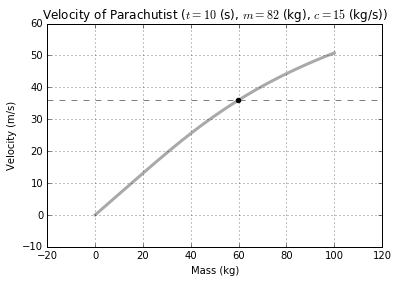

In [9]:
m = np.linspace(1e-3, 100, 100)
v = velocity(m=m, g=9.81, c=15, t=10)

plt.plot(m, v, c='darkgrey', linewidth=3)
plt.axhline(36, linestyle='--', c='grey')

plt.scatter(59.91, 36, c='k', zorder=10)

plt.title('Velocity of Parachutist ($t=10$ (s), $m=82$ (kg), $c=15$ (kg/s))')
plt.xlabel('Mass (kg)')
plt.ylabel('Velocity (m/s)')
plt.grid(which='both', linestyle=':')

plt.show()

Now we'll get the exact solution.

In [10]:
func = lambda m: velocity(m=m, g=9.81, c=15, t=10) - 36
result = bisection(func, xl=1e-3, xu=100, e_req=0.001)

print('A mass of %.2f (kg) would produce the above parameters' % result)

A mass of 59.91 (kg) would produce the above parameters


## Exercise 2

Use `bisection` to determine the drag coefficient needed so that an $82$ $kg$ parachutist has a velocity of $36$ $m/s$ after $4$ $s$ of free fall. Iterate unitl the approximate relative error falls below $0.1\%$. Also perform an error check by substituting your ifnal answer into the original equation.

I will start by plotting the function and showing the known (Wolfram Alpha) solution.

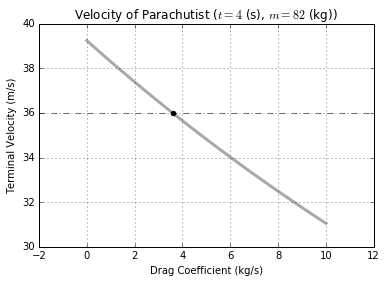

In [11]:
c = np.linspace(1e-3, 10, 100)
v = velocity(m=82, g=9.81, c=c, t=4)

plt.plot(c, v, c='darkgrey', linewidth=3)
plt.axhline(36, linestyle='--', c='grey')

plt.scatter(3.59, 36, c='k', zorder=10)

plt.title('Velocity of Parachutist ($t=4$ (s), $m=82$ (kg))')
plt.xlabel('Drag Coefficient (kg/s)')
plt.ylabel('Terminal Velocity (m/s)')
plt.grid(which='both', linestyle=':')

plt.show()

Then we can use our newly crafted function to find the exact root.

In [12]:
func = lambda c: velocity(m=82, g=9.81, c=c, t=4) - 36
result = bisection(func, xl=1e-3, xu=10, e_req=0.001)

print('A drag coefficient of %.2f would produce the above parameters' % result)

A drag coefficient of 3.59 would produce the above parameters


## Exercise 3

Determine the highest real root of 

$$
    f(x) = x^3 - 6x^2 + 11x - 6.1
$$

1. Graphically
2. Using the `newton_raphson` method (iterate until $\varepsilon_s=0.1\%$)

Again, we will fire up a quick plot with the known solutions.

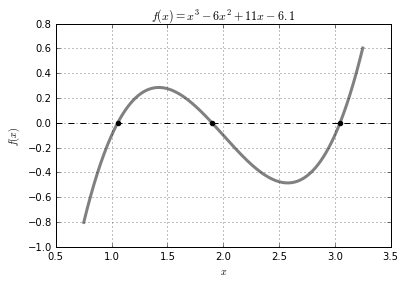

In [13]:
func = lambda x: np.power(x, 3) - 6 * np.power(x, 2) + 11 * x - 6.1

x = np.linspace(0.75, 3.25, 1000)
f = func(x)

plt.plot(x, f, linewidth=3, c='grey')
plt.axhline(0, c='k', linestyle='--', zorder=0, linewidth=1)

plt.scatter([1.05425, 1.89897, 3.04668], [0,0,0], c='k', zorder=10)

plt.title('$f(x) = x^3 - 6x^2 + 11x -6.1$')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.grid(which='both', linestyle=':')

plt.show()

And then use our root finding algorithms to find the highest root.

In [14]:
func = lambda x: np.power(x, 3) - 6*np.power(x, 2) + 11*x - 6.1
func_prime = lambda x: 3*np.power(x, 2) - 12*x + 11

print('False Position method:\t{:.3f}'.format(false_position(func, xl=2.5, xu=4.0)))
print('Bisection method:\t{:.3f}'.format(bisection(func, xl=2.5, xu=4.0)))
print('Newton-Raphson method:\t{:.3f}'.format(newton_raphson(func, func_prime, xi=4.0)))

False Position method:	3.042
Bisection method:	3.048
Newton-Raphson method:	3.047


## Exercise 4

Use the `newton_raphson` method to find the root of

$$
    f(x) = \exp(-0.5x)(4-x)-2
$$

Employ intial guesses of:

1. 2
2. 6
3. 8

Explain your results.

We can use `sympy` to quickly give us the derivative, $f^\prime(x)$, we need for the `newton_raphson` method.

In [15]:
from sympy import *

x = symbols('x')
diff(exp(-0.5 * x) * (4 - x) - 2, x).simplify()

(0.5*x - 3.0)*exp(-0.5*x)

Now we can use the `newton-raphson` in a for loop to find the roots at three different intial conditions.

**NOTE: as you probably expect, this function will fail in an infinite loop**. Goto `Kernel` $\rightarrow$ `Interrupt Kernel` to stop the process.

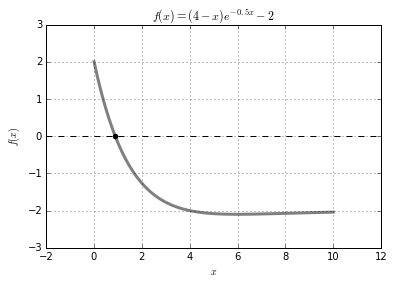

works
0.885708801994


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


KeyboardInterrupt: 

In [16]:
func =       lambda x: np.exp(-0.5 * x) * (4 - x) - 2
func_prime = lambda x: (0.5 * x - 3.0) * np.exp(-0.5 * x)

x = np.linspace(-0, 10, 1000)
y = func(x)

plt.plot(x, y, linewidth=3, c='grey')
plt.axhline(0, c='k', linestyle='--', zorder=0, linewidth=1)
plt.scatter(0.8857, 0, c='k', zorder=10)

plt.title('$f(x) = (4-x)e^{-0.5x}-2$')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.grid(which='both', linestyle=':')

plt.show()

print('works')


for xi in [2, 6, 8]:
    print(newton_raphson(func, func_prime, xi))

Some of the intial conditions failed to converge on a root. There a couple of things to notice here.

1. Initial guess 2 worked, but 6 and 8 did not.
2. At approximately $x=6$ the function slope upward
3. There is only one root, despite the change in slope

The `newton-rhapson` is essentially a hill-climbing root finding algorithm. For this reason, it attempt to climb the function at any point $x\ge6$ and therefore moves further and further from the root.

Unlikely the bracketing methods, which have the ability to recognize their interval lacks a root (or has multiple roots), open methods don't provide this security, and may diverge (crash...)